In [27]:
# LSTM
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [28]:
# Descargar los datos del Nasdaq
df = yf.download('NQ=F', start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [29]:
# Normalizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df[['Close']])

In [30]:
# Preparar los datos para el modelo LSTM
X_train = []
y_train = []
window_size = 60 # Usamos una ventana de 60 dias

In [31]:
for i in range(window_size, len(df_scaled)):
    X_train.append(df_scaled[i-window_size:i,0])
    y_train.append(df_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [32]:
# Crear el modelo LSTM
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Capa de salida con una sola unidad (precio predicho)

model.compile(optimizer='adam', loss='mean_squared_error')

2025-01-18 13:04:43.618958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-18 13:04:43.622896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-18 13:04:43.625633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [33]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2025-01-18 13:04:44.358711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-18 13:04:44.360762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-18 13:04:44.363219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 8s 118ms/step - loss: 0.0959
Epoch 2/50
22/22 [==============================] - 2s 113ms/step - loss: 0.0128
Epoch 3/50
22/22 [==============================] - 4s 166ms/step - loss: 0.0096
Epoch 4/50
22/22 [==============================] - 3s 154ms/step - loss: 0.0074
Epoch 5/50
22/22 [==============================] - 4s 185ms/step - loss: 0.0071
Epoch 6/50
22/22 [==============================] - 4s 176ms/step - loss: 0.0056
Epoch 7/50
22/22 [==============================] - 3s 135ms/step - loss: 0.0062
Epoch 8/50
22/22 [==============================] - 4s 165ms/step - loss: 0.0059
Epoch 9/50
22/22 [==============================] - 3s 126ms/step - loss: 0.0062
Epoch 10/50
22/22 [==============================] - 3s 148ms/step - loss: 0.0057
Epoch 11/50
22/22 [==============================] - 3s 149ms/step - loss: 0.0057
Epoch 12/50
22/22 [==============================] - 3s 141ms/step - loss: 0.0054
Epoch 13/50
22/22 [=================

In [34]:
# Hacer predicciones sobre nuevos datos
df_test = yf.download('NQ=F', start='2023-01-02', end='2024-01-01')
df_total = pd.concat((df['Close'], df_test['Close']), axis=0)
inputs = df_total[len(df_total) - len(df_test) - window_size:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

[*********************100%***********************]  1 of 1 completed

In [35]:
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i-window_size:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [36]:
# Predecir los precios
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

2025-01-18 13:07:50.508714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-18 13:07:50.511383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-18 13:07:50.513579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 57ms/step


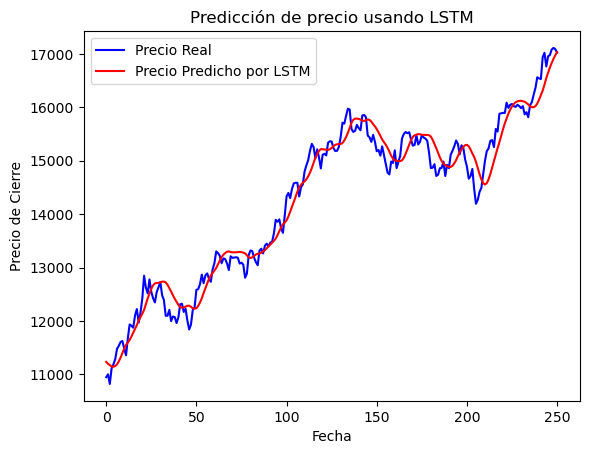

In [37]:
# Graficar los resultados

plt.plot(df_test['Close'].values, color='blue', label='Precio Real')
plt.plot(predicted_price, color='red', label='Precio Predicho por LSTM')
plt.title('Predicción de precio usando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

In [38]:
# Calcular RMSE
rmse = np.sqrt(mean_squared_error(df_test['Close'].values, predicted_price))

In [39]:
# Calcular MAE
mae = mean_absolute_error(df_test['Close'].values, predicted_price)

In [40]:
# Calcular MAPE
mape = mean_absolute_percentage_error(df_test['Close'].values, predicted_price)

In [41]:
# Generar el resumen del performance
performance_summary = f"""
Evaluación del Model LSTM para la predicción del Nasdaq:

- RMSE (Raiz del Error Cuadrático Medio): {rmse:.2f}
- MAE (Error Absolute Medio): {mae:.2f}
- Mape (Error Porcentaul Absoluto Medio): {mape * 100:.2f}%

"""

print(performance_summary)


Evaluación del Model LSTM para la predicción del Nasdaq:

- RMSE (Raiz del Error Cuadrático Medio): 282.28
- MAE (Error Absolute Medio): 230.55
- Mape (Error Porcentaul Absoluto Medio): 1.62%


